# Code profiling

<font size=3> Existen varios módulos de python que ayudan a evaluar la eficiencia de los códigos. En esta clase veremos las siguientes:
    
    - cProfile
    - pstats

In [1]:
import cProfile
import pstats 
import numpy as np
import planta_en_paisaje as pp

<font size='3'> Como primera instancia, evaluemos la operación de multiplicar 3*5. Para eso ocuparemos la función $run$ de cProfile.

In [5]:
cProfile.run("3*5")

         3 function calls in 0.002 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.002    0.002    0.002    0.002 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




<font size='3'>Entendamos el output de esta función. 

La primera línea muestra el número de funciones llamadas y el tiempo que les tomó en correr. 


La segunda línea muestra Ordered by: standard name, que significa que el siguiente string en la columna de más a la derecha fue usada para ordenar el output. Este puede cambiar con el parámetro sort.

    
La tercera línea en adelante contiene las funciones y subfunciones llamadas internamente. Veamos que significa cada columna de la tabla.

- ncalls : Muestra el número de veces que se llamó la función
    
- tottime: Tiempo total tomado por cada función. Notar que el tiempo tomado en sub-funciones está excluido. 
    
- percall: Tiempo total / número de llamadas. ( remainder is left out )
    
- cumtime: A diferencia de tottime, éste incluye el tiempo tomado en esta y todas las sub-funciones que la función de mayor nivel llama. Es el más útil y es accurate para funciones recursivas.
    
- el percall que va después de cumtime es calculado como el cuociente del cumtime dividido por llamadas primitivas. Las llamadas primitivas incluyen todas las llamadas que no fueron incluidas a través de la recursión.
    
    
    
tottime y cumtime son útiles. Una función con un alto tottime significa que debemos enfocarnos en 'acelerar' esta función. Una función con sólo un alto cumtime significa que deberíamos ver qué llama esta función para mejorar el tiempo en que corre.

## Haciendo Code profiling para una función que llama a otras

<font size='3'> Para esto veamos el siguiente ejemplo, el cual crea una lista de 400000 elementos.

In [7]:
def create_array():
    arr=[]
    for i in range(0,400000):
        arr.append(i)

def print_statement():
    print('Array created successfully')


def main():
    create_array()
    print_statement()


if __name__ == '__main__':
    cProfile.run('main()')

Array created successfully
         400041 function calls in 0.185 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.114    0.114    0.176    0.176 <ipython-input-7-77871eb6673f>:1(create_array)
        1    0.009    0.009    0.185    0.185 <ipython-input-7-77871eb6673f>:10(main)
        1    0.000    0.000    0.000    0.000 <ipython-input-7-77871eb6673f>:6(print_statement)
        1    0.000    0.000    0.185    0.185 <string>:1(<module>)
        3    0.000    0.000    0.000    0.000 iostream.py:195(schedule)
        2    0.000    0.000    0.000    0.000 iostream.py:308(_is_master_process)
        2    0.000    0.000    0.000    0.000 iostream.py:321(_schedule_flush)
        2    0.000    0.000    0.000    0.000 iostream.py:384(write)
        3    0.000    0.000    0.000    0.000 iostream.py:91(_event_pipe)
        3    0.000    0.000    0.000    0.000 socket.py:438(send)
        3    0.000    0.000    0.000  

<font size='3'> A partir del output podemos observar como el método que más se demoró fue for i in range(0,400000), que llamó 400000 veces la función append. 
    Por defecto, cProfile ordena su output por 'standard name', lo cual puede no ser muy útil para funciones complejas o en casos donde el código tiene muchos pasos. Por suerte, podemos modificar los reportes de Profile!.

Si te interesa encontrar las partes donde más se consume tiempo, puede ser útil ordenar los outputs por ncalls. Para hacer esto debes hacer lo siguiente: 
    
    - Primero inicializa una instancia de la clase Profile
    - Llama el método enable() del profiler para comenzar a colectar los datos de profiling
    - Llama la función al que quieres hacer profile
    - Para parar de colectar datos, llama el método disable()

Y ahora, ¿cómo se reporta los datos recolectados? 
    
El módulo pstats puede ser usado para manipular los resultados recolectados poe el objeto Profiler. Primero, crea una instancia de la clase stats usando psats.Stats. Luego, usa la clase Stats para crear un objeto estadístico a partir del objeto Progile a través de stats = pstats.Stats(profiler). Ahora, puedes ordenar el output por ncalls usando el método sort_stats() como se muestra abajo, Finalmente para mostrar el output, llama la función print_stats() del objeto stats.

In [11]:
def create_array():
    arr=[]
    for i in range(0,400000):
        arr.append(i)

def print_statement():
    print('Array created successfully')


def main():
    create_array()
    print_statement()

profiler = cProfile.Profile()
profiler.enable()
main()
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('ncalls')
stats.print_stats()



Array created successfully
         400083 function calls in 0.206 seconds

   Ordered by: call count

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   400000    0.096    0.000    0.096    0.000 {method 'append' of 'list' objects}
        4    0.000    0.000    0.000    0.000 {built-in method builtins.getattr}
        4    0.000    0.000    0.000    0.000 {built-in method builtins.next}
        4    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/IPython/core/compilerop.py:166(extra_flags)
        3    0.000    0.000    0.000    0.000 {method 'append' of 'collections.deque' objects}
        3    0.000    0.000    0.000    0.000 {method 'acquire' of '_thread.lock' objects}
        3    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/threading.py:529(is_set)
        3    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/threading.py

<font size='3'> De la misma manera, puedes ordenar según diferentes parámetros $percall$, $tottime$, $cumtime$...

<font size = '3'> También puedes imprimir las primeras 15 funciones que se demoran más, de la forma: 

In [16]:
stats.sort_stats('time').print_stats(15)

         400083 function calls in 0.206 seconds

   Ordered by: internal time
   List reduced from 39 to 15 due to restriction <15>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.102    0.102    0.198    0.198 <ipython-input-11-9cba0279cd77>:1(create_array)
   400000    0.096    0.000    0.096    0.000 {method 'append' of 'list' objects}
        1    0.008    0.008    0.206    0.206 <ipython-input-11-9cba0279cd77>:10(main)
        3    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/zmq/sugar/socket.py:438(send)
        2    0.000    0.000    0.000    0.000 {built-in method builtins.compile}
        2    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/ipykernel/iostream.py:384(write)
        2    0.000    0.000    0.206    0.103 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3400(run_c

<font size = '3'> Se pueden añadir múltiples filtros, como por ejemplo las 15 funciones con 'append' que se demoraron más.

In [13]:
stats.sort_stats("time").print_stats('append', 15)


         400083 function calls in 0.206 seconds

   Ordered by: internal time
   List reduced from 39 to 2 due to restriction <'append'>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   400000    0.096    0.000    0.096    0.000 {method 'append' of 'list' objects}
        3    0.000    0.000    0.000    0.000 {method 'append' of 'collections.deque' objects}




## Actividad

<font size='3'> La siguiente celda de código simula el impacto en temperatura de una termoeléctrica en un paisaje de mar y montaña (mirar la documentación para entender qué hace cada función). Este script no está para nada eficiente, y es tu labor encontrar cuáles son las partes más ineficientes, apóyate de lo que vimos anteriormente para:
    
    1. Ordenar el diagnóstico de cProfile por número de llamadas (ncalls). 
    
    2. Mostrar las 12 funciones que más se demoran en correr (time).
    
    3. Encontrar la función que más se demora.

2239


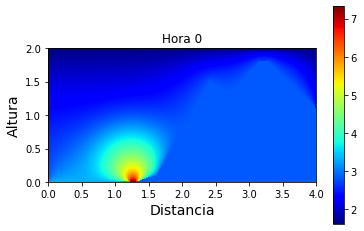

In [8]:
Temp = np.zeros([200, 400])
Borde = np.zeros([200, 400])
hora = 0 # tiempo desde que se prendió la termoelectrica
w = 1.5 # parámetro libre
BordesFijos = pp.CreaBordes(Borde)
pp.plot_paisaje(Temp, BordesFijos, hora, 1.5)

2239


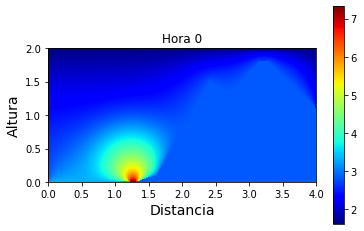

         1329046 function calls (1322969 primitive calls) in 723.915 seconds

   Ordered by: call count

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
899404/899358    0.817    0.000    0.817    0.000 {built-in method builtins.len}
    49486    0.021    0.000    0.021    0.000 /Users/paulacaceresburgos/Science_and_Commit/Workshop_2022/4_code_profilling_and_releasing/planta_en_paisaje.py:39(atmosfera)
    30362    0.010    0.000    0.010    0.000 /Users/paulacaceresburgos/Science_and_Commit/Workshop_2022/4_code_profilling_and_releasing/planta_en_paisaje.py:19(mar)
    17520    0.003    0.000    0.003    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/inspect.py:2577(kind)
    15693    0.007    0.000    0.019    0.000 {built-in method builtins.isinstance}
    10676    0.005    0.000    0.005    0.000 {method 'items' of 'dict' objects}
     9024    0.002    0.000    0.002    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/inspect.py:2565

      183    0.000    0.000    0.000    0.000 {method 'copy' of 'list' objects}
      182    0.001    0.000    0.001    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1312(is_math_text)
   176/71    0.008    0.000    0.008    0.000 {built-in method _abc._abc_subclasscheck}
   176/71    0.000    0.000    0.008    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/abc.py:100(__subclasscheck__)
      175    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/axis.py:360(<genexpr>)
  170/150    0.002    0.000    0.010    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/traitlets/traitlets.py:533(get)
      170    0.003    0.000    0.006    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/transforms.py:2311(__init__)
      170    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/

       71    0.000    0.000    0.001    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:1044(set_fontsize)
       71    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2760(_get_axis_list)
       71    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/axis.py:566(locator)
       70    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1654(<lambda>)
       70    0.004    0.000    0.017    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/lines.py:660(recache)
       70    0.001    0.000    0.001    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:735(get_color)
       69    0.000    0.000    0.006    0.000 {method 'clip' of 'numpy.ndarray' obj

       37    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/sre_parse.py:286(tell)
       36    0.000    0.000    0.000    0.000 {method 'items' of 'mappingproxy' objects}
       36    0.000    0.000    0.000    0.000 {method 'format' of 'str' objects}
       36    0.000    0.000    0.000    0.000 {built-in method numpy.geterrobj}
       36    0.000    0.000    0.037    0.001 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:272(update_from)
       36    0.001    0.000    0.002    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/patches.py:546(_bind_draw_path_function)
       36    0.000    0.000    0.001    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/axis.py:1630(set_major_locator)
       35    0.000    0.000    0.000    0.000 {built-in method _imp.acquire_lock}
       35    0.000    0.000    0.000    0.000 {built-in method _imp.

       15    0.000    0.000    0.000    0.000 {method 'any' of 'numpy.ndarray' objects}
       15    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/_collections_abc.py:311(__subclasshook__)
       15    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/_collections_abc.py:698(values)
       15    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/traitlets/traitlets.py:1864(make_dynamic_default)
       15    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/hatch.py:189(_validate_hatch_pattern)
       14    0.001    0.000    0.001    0.000 {method 'acquire' of '_thread.lock' objects}
       14    0.000    0.000    0.000    0.000 {built-in method _struct.pack}
       14    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:385(cached)
       14    0.000    0.000    0.000    0.000 <froz

        9    0.000    0.000    0.007    0.001 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:133(draw_path)
        8    0.000    0.000    0.000    0.000 {built-in method _sre.unicode_iscased}
        8    0.000    0.000    0.000    0.000 {built-in method _struct.calcsize}
        8    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:36(_relax_case)
        8    0.000    0.000    0.011    0.001 <frozen importlib._bootstrap_external>:1438(find_spec)
        8    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/traitlets/traitlets.py:1150(hold_trait_notifications)
        8    0.001    0.000    0.001    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/zmq/sugar/socket.py:438(send)
        8    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/ipykernel/iostream.py:91(_event_pipe)


        5    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:624(_register_loader)
        5    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:636(decorator)
        5    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:635(_register_writer)
        4    0.000    0.000    0.000    0.000 {method 'keys' of 'dict' objects}
        4    0.000    0.000    0.000    0.000 {method 'copy' of 'dict' objects}
        4    0.000    0.000    0.000    0.000 {method 'add' of 'set' objects}
        4    0.000    0.000    0.000    0.000 {method '__reduce_ex__' of 'object' objects}
        4    0.000    0.000    0.000    0.000 {method 'rfind' of 'str' objects}
        4    0.000    0.000    0.000    0.000 {built-in method _abc._abc_init}
        4    0.000    0.000    0.000   

        3    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/figure.py:75(_entry_from_axes)
        3    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/figure.py:82(bubble)
        3    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/figure.py:1493(sca)
        3    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/figure.py:2375(get_tight_layout)
        3    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/figure.py:2379(set_tight_layout)
        3    0.000    0.000    0.008    0.003 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/figure.py:2405(set_constrained_layout)
        3    0.000    0.000    0.000    0.000 /Users/paulacaceresbu

        2    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/spines.py:536(__init__)
        2    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/spines.py:539(from_dict)
        2    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/image.py:299(changed)
        2    0.005    0.002    0.032    0.016 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/image.py:307(_make_image)
        2    0.001    0.001    0.036    0.018 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/image.py:616(draw)
        2    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/image.py:800(get_resample)
        2    0.000    0.000    0.033    0.016 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/

        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:4172(_meshgrid_dispatcher)
        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:4288(<listcomp>)
        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:4301(<listcomp>)
        1    0.000    0.000    0.002    0.002 /Users/paulacaceresburgos/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:4177(meshgrid)
        1    0.000    0.000    0.003    0.003 <__array_function__ internals>:2(meshgrid)
        1    0.000    0.000    0.002    0.002 /Users/paulacaceresburgos/.local/lib/python3.9/site-packages/numpy/lib/stride_tricks.py:544(<listcomp>)
        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/.local/lib/python3.9/site-packages/numpy/ma/core.py:4536(ravel)
        1    

        1    0.000    0.000    0.017    0.017 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/PIL/JpegImagePlugin.py:34(<module>)
        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:130(<dictcomp>)
        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:289(IFDRational)
        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:403(ImageFileDirectory_v2)
        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:893(ImageFileDirectory_v1)
        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:992(TiffImageFile)
        1    0.000    0.000    0.000    0.000 /Users/

In [4]:
def main():
    hora = 0 # tiempo desde que se prendió la termoelectrica
    w = 1.5 # parámetro libre
    Temp = np.zeros([200, 400])
    Borde = np.zeros([200, 400])
    BordesFijos = pp.CreaBordes(Borde)
    pp.plot_paisaje(Temp, BordesFijos, hora, w)
    
if __name__ == '__main__':
    profiler = cProfile.Profile()
    profiler.enable()
    main()
    profiler.disable()
    stats = pstats.Stats(profiler).sort_stats('ncalls')
    stats.print_stats()

In [8]:
stats.sort_stats('time').print_stats(12)

         1329046 function calls (1322969 primitive calls) in 723.915 seconds

   Ordered by: internal time
   List reduced from 1754 to 12 due to restriction <12>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     2240  716.572    0.320  717.745    0.320 /Users/paulacaceresburgos/Science_and_Commit/Workshop_2022/4_code_profilling_and_releasing/planta_en_paisaje.py:177(Itera_uno)
     2240    4.107    0.002    4.489    0.002 /Users/paulacaceresburgos/Science_and_Commit/Workshop_2022/4_code_profilling_and_releasing/planta_en_paisaje.py:211(no_ha_convergido)
899404/899358    0.817    0.000    0.817    0.000 {built-in method builtins.len}
     6053    0.721    0.000    0.721    0.000 {method 'copy' of 'numpy.ndarray' objects}
     4999    0.309    0.000    0.309    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.252    0.252    0.283    0.283 /Users/paulacaceresburgos/Science_and_Commit/Workshop_2022/4_code_profilling_and_releasing/planta_en_paisa

In [12]:
stats.print_callers('numpy.array')

   Ordered by: call count
   List reduced from 1479 to 1 due to restriction <'numpy.array'>

Function                       was called by...
                                   ncalls  tottime  cumtime
{built-in method numpy.array}  <-    1946    0.010    0.010  /Users/paulacaceresburgos/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:23(asarray)
                                      838    0.005    0.005  /Users/paulacaceresburgos/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:110(asanyarray)
                                      360    0.001    0.001  /Users/paulacaceresburgos/.local/lib/python3.9/site-packages/numpy/lib/shape_base.py:612(column_stack)
                                        2    0.000    0.000  /Users/paulacaceresburgos/.local/lib/python3.9/site-packages/numpy/lib/stride_tricks.py:339(_broadcast_to)
                                      154    0.000    0.000  /Users/paulacaceresburgos/.local/lib/python3.9/site-packages/numpy/lib/stride_tricks.py:

60


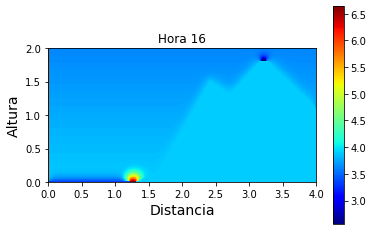

         445968 function calls (439617 primitive calls) in 15.962 seconds

   Ordered by: call count

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    49486    0.029    0.000    0.029    0.000 /Users/paulacaceresburgos/Science_and_Commit/Workshop_2022/4_code_profilling_and_releasing/planta_en_paisaje.py:39(atmosfera)
    30362    0.013    0.000    0.013    0.000 /Users/paulacaceresburgos/Science_and_Commit/Workshop_2022/4_code_profilling_and_releasing/planta_en_paisaje.py:19(mar)
30065/30019    0.013    0.000    0.013    0.000 {built-in method builtins.len}
    18108    0.003    0.000    0.003    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/inspect.py:2577(kind)
    16159    0.006    0.000    0.009    0.000 {built-in method builtins.isinstance}
     9438    0.005    0.000    0.005    0.000 {function RcParams.__getitem__ at 0x7ff71ac77e50}
     9318    0.002    0.000    0.002    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/inspe

      263    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/transforms.py:222(<lambda>)
      263    0.001    0.000    0.009    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/axis.py:1982(getter)
      262    0.000    0.000    0.002    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/artist.py:993(set_visible)
  259/257    0.000    0.000    0.002    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/transforms.py:1089(get_points)
      259    0.003    0.000    0.013    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/font_manager.py:638(__init__)
      259    0.000    0.000    0.001    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/font_manager.py:781(set_family)
      259    0.001    0.000    0.002    0.000 /Users/paulacaceresburgos/opt

      108    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1890(_str_lower_equal)
      108    0.000    0.000    0.001    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/transforms.py:1813(frozen)
      103    0.001    0.000    0.003    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/axis.py:464(update_position)
      101    0.000    0.000    0.001    0.000 {built-in method builtins.all}
      100    0.000    0.000    0.000    0.000 {method 'get_width_height' of 'matplotlib.ft2font.FT2Font' objects}
      100    0.001    0.000    0.002    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/artist.py:1131(update_from)
      100    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:25(_wrap_text)
      100    0.001    0.000    

       51    0.002    0.000    0.003    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2763(_get_axis_map)
       50    0.000    0.000    0.000    0.000 {built-in method builtins.round}
       50    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:590(__setitem__)
    50/49    0.000    0.000    0.001    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/transforms.py:392(bounds)
       50    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/transforms.py:2086(get_matrix)
       50    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/cycler.py:371(<genexpr>)
       50    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:230(_get_multiali

       24    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/axis.py:1506(set_units)
       24    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/axis.py:1919(_get_ticks_position)
       24    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/axis.py:1956(get_label_position)
       24    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/axis.py:2223(get_ticks_position)
       24    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/_layoutgrid.py:255(edit_margin)
       24    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/_layoutgrid.py:295(edit_margins)
       23    0.000    0.000    0.000    0.000 {method '

       11    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/_api/deprecation.py:327(wrapper)
       11    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:112(_weak_or_strong_ref)
       11    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:200(connect)
       11    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/transforms.py:487(transformed)
       11    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/artist.py:709(get_figure)
       10    0.000    0.000    0.000    0.000 {method 'values' of 'collections.OrderedDict' objects}
       10    0.000    0.000    0.000    0.000 {method 'append' of 'collections.deque' objects}
       10 

        7    0.000    0.000    0.001    0.000 <frozen importlib._bootstrap_external>:1309(_get_spec)
        7    0.000    0.000    0.001    0.000 <frozen importlib._bootstrap_external>:1341(find_spec)
        7    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:1433(_get_spec)
        7    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/_collections_abc.py:377(__subclasshook__)
        7    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/traceback.py:292(walk_stack)
      7/1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/ipykernel/jsonutil.py:73(json_clean)
        7    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/.local/lib/python3.9/site-packages/numpy/core/numeric.py:148(ones)
        7    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/.local/lib/python3.9/site-packages/numpy/core/_ufunc_config.p

        4    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/figure.py:88(add)
        4    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/figure.py:116(__contains__)
        4    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/figure.py:124(__init__)
        4    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/figure.py:233(<lambda>)
        4    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/gridspec.py:33(__init__)
        4    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:221(__init__)
        4    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python

        2    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/traitlets/traitlets.py:2038(validate)
        2    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/traitlets/config/configurable.py:86(notice_config_override)
        2    0.000    0.000    0.001    0.001 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/traitlets/config/configurable.py:47(__init__)
        2    0.000    0.000    0.001    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/traitlets/config/configurable.py:150(_load_config)
        2    0.000    0.000    0.001    0.001 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/traitlets/config/configurable.py:192(_config_changed)
        2    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/traitlets/config/loader.py:257(merge)
        2    0.000    0

        1    0.000    0.000    0.000    0.000 {built-in method PIL._imaging.fill}
        1    0.000    0.000    0.000    0.000 {built-in method PIL._imaging.zip_encoder}
        1    0.000    0.000    0.000    0.000 {built-in method PIL._imaging.map_buffer}
        1    0.000    0.000    0.000    0.000 {method 'copy' of 'ImagingCore' objects}
        1    0.025    0.025    0.025    0.025 {method 'encode' of 'ImagingEncoder' objects}
        1    0.000    0.000    0.000    0.000 {method 'cleanup' of 'ImagingEncoder' objects}
        1    0.000    0.000    0.000    0.000 {method 'setimage' of 'ImagingEncoder' objects}
        1    0.000    0.000    0.000    0.000 {method 'draw_image' of 'matplotlib.backends._backend_agg.RendererAgg' objects}
        1    0.000    0.000    0.000    0.000 {method 'draw_path_collection' of 'matplotlib.backends._backend_agg.RendererAgg' objects}
        1    0.000    0.000    0.000    0.000 {method 'draw_quad_mesh' of 'matplotlib.backends._backend_agg.Rende

        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py:738(<dictcomp>)
        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py:730(_draw_disabled)
        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py:1562(Done)
        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py:1565(_draw)
        1    0.000    0.000    0.001    0.001 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py:1551(_get_renderer)
        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py:2030(draw)
        1    0.000    0.000    0.000    0.000 /Users

        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:130(<dictcomp>)
        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:289(IFDRational)
        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:403(ImageFileDirectory_v2)
        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:893(ImageFileDirectory_v1)
        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:992(TiffImageFile)
        1    0.000    0.000    0.000    0.000 /Users/paulacaceresburgos/opt/miniconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:1665(AppendingTiffWriter)
        1    0.000    0.000    0.006    

In [2]:
def main():
    hora = 16 # tiempo desde que se prendió la termoelectrica
    w = 1.6 # parámetro libre
    Temp = np.zeros([200, 400])
    Borde = np.zeros([200, 400])
    BordesFijos = pp.CreaBordes(Borde)
    pp.plot_paisaje(Temp, BordesFijos, hora, w, tol=1e-2)
    
if __name__ == '__main__':
    profiler = cProfile.Profile()
    profiler.enable()
    main()
    profiler.disable()
    stats = pstats.Stats(profiler).sort_stats('ncalls')
    stats.print_stats()

In [3]:
stats.sort_stats('time').print_stats(12)

         445968 function calls (439617 primitive calls) in 15.962 seconds

   Ordered by: internal time
   List reduced from 1754 to 12 due to restriction <12>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       61   14.876    0.244   14.892    0.244 /Users/paulacaceresburgos/Science_and_Commit/Workshop_2022/4_code_profilling_and_releasing/planta_en_paisaje.py:177(Itera_uno)
        1    0.253    0.253    0.295    0.295 /Users/paulacaceresburgos/Science_and_Commit/Workshop_2022/4_code_profilling_and_releasing/planta_en_paisaje.py:146(Inicial)
       61    0.102    0.002    0.108    0.002 /Users/paulacaceresburgos/Science_and_Commit/Workshop_2022/4_code_profilling_and_releasing/planta_en_paisaje.py:211(no_ha_convergido)
        1    0.044    0.044    0.044    0.044 /Users/paulacaceresburgos/Science_and_Commit/Workshop_2022/4_code_profilling_and_releasing/planta_en_paisaje.py:77(CreaBordes)
     8875    0.030    0.000    0.030    0.000 {method 'items' of 'dict

# Estrategia para hacer Code Profiling

<font size='3'>
Generalmente, es importante enfocarse en acelerar 1 o 2 de las funciones más lentas. Si aceleras algo que toma 50% del runtime por un factor de 100, aceleras tu código por un factor de 2. Incluso si una parte de tu código ocupa el 10% del runtime, una mejora de un factor de 2 (que es difícil de obtener) sólo te dará una mejora del 5%. Es mejor enfocarse en mejorar el runtime de 1 o 2 de las funciones que más se demoran.

## Formas de acelerar tu código
<font size='3'> Si ya encontraste el bloque de código que debes acelerar, la estrategia general es eliminar computaciones innecesarias lo más que se pueda. Desafortunadamente no hay un sólo método para acelerar tu código. Pero aquí hay algunas ideas:
1. Eliminar computaciones que no estén siendo usadas (por ejemplo, variables que no se estén ocupando, procesar datos que finalmente serán desechados)
2. Usar funciones numpy cuando sea posible para operaciones matriciales
3. Evitar usar loops for y while ya que son lentos.
4. ?
5. Reducir el número de iteraciones o aumentar la tolerancias de rutinas que son innecesariamente precisas (por ejemplo: optimizadores pueden correr por menos iteraciones, seno y coseno pueden ser aproximados a sus expansiones de taylor)
6. Evitar copiar variables cuando no es necesario copiarlas (por ejemplo: si el input ya está en numpy.array, no es necesario aplicarle np.array() para asegurarse que sea numpy.array)
7. Convertir parte de tu código python a código en C y llamarlo con python
8. Otras ideas?

## Extrapolación del rendimiento de tu código 

<font size='3'> Si tu código se demora varias horas en correr, o necesita ser corrido en un cluster, probablemente es más fácil 
desarrollarlo y compararlo con tu laptop. Podemos extrapolarlo para estimar su rendimiento.

### Runtime
 
Generalmente los runtime de los algoritmos escalan como N^a donde a es un número positivo mayor a 1, y N es el tamaño del data (también se expresa en notación de O(n)). Si tu data es demasiado grande o toma mucho tiempo para ser evaluado por una sola máquina, intenta correr tu código en un set más pequeño de data. Si haces esto con 3 a 5 sets de data con diferente N, puedes estimar el escalamiento de tu código (el valor de 'a').
Una vez que sabes cómo escala tu código, puedes usar tu relación de escalamiento para extrapolar cuánto se demorará para un set más grande de datos. Si también puedes usar más núcleos, puedes dividir el runtime final por el número de cores que puedes usar. 

Por ejemplo, mi código tarda 10 segundos con data de 10x10, 10000 segundos con data de 100x100, y 40000 segundos con data de 200x200 (en un puro core). Mi código escala como N^2 donde N es el tamaño de una dimensión de la data. Si quiero correrlo con data de 10000x10000 con 100 cores, mi código se demoraría (10000^2)/100 = 1000000 segundos en correr.

#### Memoria
Si estás preocupade que te tu programa se quede sin memoria, intenta calcular cuánta memoria ocupa tu programa. En máquinas modernas de 64-bit, un sólo número (integer, float) ocupa sólo 8 bytes. Si tienes un array de 1000x1000 floats, entonces ocupará 8e6 bytes, que equivalen a 8MBs. Si tienes una data en 3-D con dimensiones 1000x1000x1000, entonces ocupará de 8e9 = 8 GBs.

<font size = '3'> Para medir los tiempos en que se demora en correr tu programa, es recomendable el módulo timeit. Aquí una pequeña demostración de cómo se ocupa:

In [2]:
import timeit